In [15]:
import numpy as np
from os import listdir
import os, random, copy
from collections import defaultdict
import matplotlib.pyplot as plt

In [16]:

#INPUT: List of numpy arrays
#OUTPUT: list of flattened numpy arrays with a 1 to account for bias at the front 
def Transform(aSeriesOfUnfortunateEvents): #Flatten the  numpy arrays and add a bias term to the front
    countOlaf = list()
    for baudelaire in aSeriesOfUnfortunateEvents:
        countOlaf.append(np.concatenate((np.array([1]),baudelaire.flatten())))
    return countOlaf 


#INPUT: 1) Flattened images  2) targets 3) The current weights 
#OUPUT: A float representing the current loss
def CrossEntropy(battleMages, targetDog, w):
    if len(battleMages) != len(targetDog):
        print("Ugh what is going on?")
    theOneSumToRuleThemAll = 0
    for i in range(len(battleMages)):
        if targetDog[i] == 1:
            theOneSumToRuleThemAll += np.log(ComputeSigmoidFunction(np.dot(battleMages[i], w)))
        else:
            #print(w)
            #print((w * [-1]))
            theOneSumToRuleThemAll += np.log(ComputeSigmoidFunction(np.dot(battleMages[i], (w * -1))))
        
    return (-1* theOneSumToRuleThemAll)

#Batch gradient computation for each pixel
#INPUT: 1) Flattened images  2) targets 3) The current weights 
#OUPUT: gradient for each pixel as a list
def Gradient(faces, whereDoIBelong, weigh):
    if len (weigh) != len(faces[0]):
        print("just... why?")
        return None
    gradient = [0]*len(weigh)
    
    for i in range(len(faces)): #over all samples --> batch
        intermediate = ComputeSigmoidFunction(np.dot(faces[i],weigh))
        for j in range(len(faces[i])): 
            gradient[j] += (whereDoIBelong[i] - intermediate)*faces[i][j]
                                
    return np.array(gradient).reshape(len(gradient), 1)

def ComputeSigmoidFunction(power):
    if type(power) is np.ndarray:
        if len(power) > 1:
            print("um what?")
        power = power[0]
    return 1/(1 + np.exp(-1 * power))

The loss is: 970.4060527838883
0.00014285714285714287


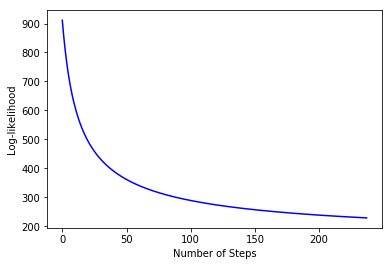

In [18]:
if __name__ == "__main__":
    classOne = np.loadtxt("new_train3.txt")
    classTwo = np.loadtxt("new_train5.txt")  
    combined = list()
    targets = list()
    for el in classOne:
        combined.append(el)
        targets.append(0)
    for el in classTwo:
        combined.append(el)
        targets.append(1)
    
    weights = [0]*len(combined[0])
    weights = np.array(weights).reshape(len(weights), -1) #column vector
    print("The loss is: " + str(CrossEntropy(combined, targets, weights)))
    learningRate = 0.2/(len(combined))
    print(learningRate)
    iteration = []
    whatAt = []
    for i in range(238):
        weights = weights + learningRate*Gradient(combined, targets, weights)
        iteration.append(i)
        whatAt.append(CrossEntropy(combined, targets, weights))
    
    plt.plot(iteration, whatAt, 'b')
    plt.ylabel("Log-likelihood")
    plt.xlabel("Number of Steps")

In [8]:
import pandas as pd

classOne = np.loadtxt("new_test3.txt")
classOne[0]


array([0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

In [19]:
whatAt[len(whatAt)-1]

228.5448248631861